In [1]:
import pandas as pd
data = pd.read_csv('FRvideos.csv')

In [2]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [3]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06


In [4]:
import matplotlib.pyplot as plt

Рассмотрим распределение просмотров. Поскольку распределение имеет очень большой "хвост" в сторону больших просмотров. Для более качественной визуализации ограничим данные сверху.

In [5]:
data2 = data['views'].clip(0, 1e6)

<AxesSubplot:title={'center':'Views distribution in Franch Youtube'}>

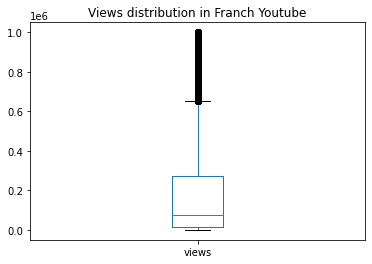

In [7]:
data2.plot(kind = 'box', title = 'Views distribution in Franch Youtube', grid = False)

Действительно, имеется большое количество выбросов "сверху". Медиана находится на уровне 419921 просмотров.

Рассмотрим распределение лайков c помощью гисторгаммы.

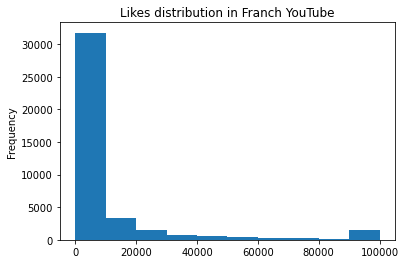

In [22]:
data3 = data['likes'].clip(0, 1e5)
data3.plot(kind='hist', title = 'Likes distribution in Franch YouTube', xlabel = 'Likes')
plt.show()

Как мы видим, распределение лайков также имеет множество выбросов, которые смещены в большую сторону. Медиана находится на уровне 17388.

In [13]:
top_10_chains = data[['views', 'channel_title']].groupby(by = 'channel_title').sum().sort_values(by = 'views', ascending = False).head(10)
top_10_chains

,views
channel_title,
Dude Perfect,305226697
ibighit,291768132
YouTube Spotlight,254422431
PewDiePie,243522111
Marvel Entertainment,223358474
TaylorSwiftVEVO,174371361
MLG Highlights,163697067
Çukur,163668822
ChildishGambinoVEVO,153765066


<AxesSubplot:title={'center':'Top 10 channel in Franch YouTube'}, ylabel='YouTube channel'>

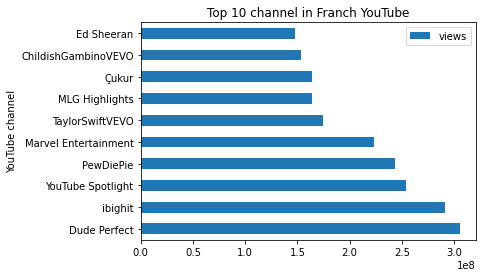

In [18]:
top_10_chains.plot(kind = 'barh', title = 'Top 10 channel in Franch YouTube', xlabel = 'YouTube channel')

Как мы видим, наиболее популярный канал во французском YouTube на основе наших данных - Dude Perfect. Данный канал имеет суммарное наибольшее количество просмотров.

In [6]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Рассмотрим как взаимосвязаны межу собой просмотры, лайки, дизлайки и количество комментариев в наборе данных с видео французского Youtube.

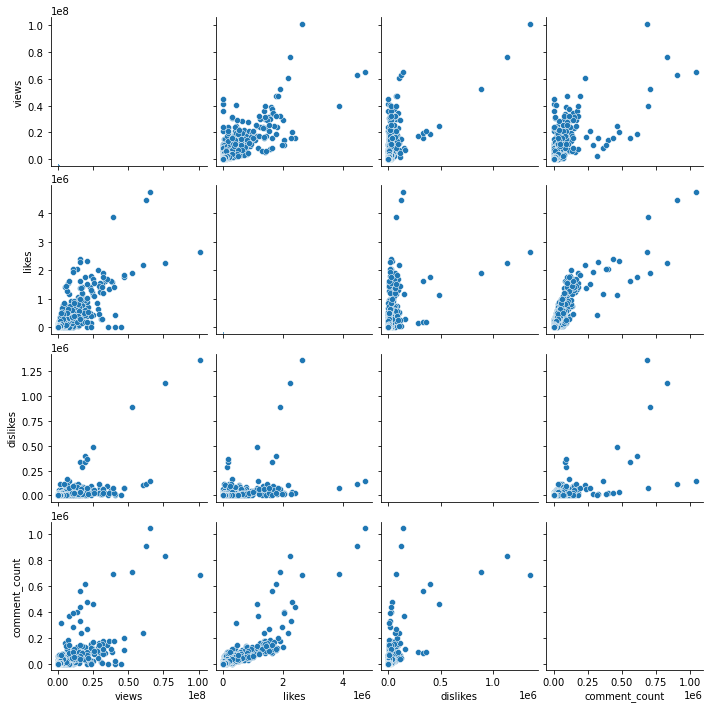

In [8]:
sns.pairplot(data[['views', 'likes', 'dislikes', 'comment_count']])

Как мы видим наиболее четкую прямую взаимосвязь можно увидеть между данными лайков и просмотров, лайков и количеством комментариев.